**Hello folks!******

I started with Machine Learning a couple of months back.In the college summer breaks I came to know about Kaggle and this is my first Kernel.Since this is my first kernel and first real world dataset , I certailny would have made number of mistakes.Point my mistakes so it helps me code better next time :)

**Thing Covered in Kernel:**
1. Histogram of Average Cost for 2 person
2. Best Rated Restraunts in Town
3. Restraunt Count area wise
4. Area with most Rated Restraunts
5. Average cost per Area
6. Number of Restraunts in rating range
7. Top chains Restraunt

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['zomato.csv']


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('../input/zomato.csv')

In [4]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
#removing redundant data based on address and name
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**There exists a large number of redundant values . Also it is to be noted that not all are different , they just differ in listed_in(type) hence it is necessary to remove duplicates based on name and address.**

In [6]:
df[df['name']=='Onesta']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
44,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Delivery,Banashankari
557,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\r\r\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Dine-out,Banashankari
909,https://www.zomato.com/bangalore/onesta-jp-nag...,"Site 15, 15th Cross, 100 Feet Road, 4th Phase,...",Onesta,Yes,Yes,4.4/5,4381,+91 8904001150\r\n+91 8904001151,JP Nagar,"Casual Dining, Cafe","Chicken Alfredo Pizza, Coffee Mousse, Chicken ...","Pizza, Cafe, Italian",600,"[('Rated 2.0', 'RATED\n Unhygienic place , ch...","['French Fries', 'Crispy Chicken with Bbq Sauc...",Cafes,Bannerghatta Road
1015,https://www.zomato.com/bangalore/onesta-jp-nag...,"Site 15, 15th Cross, 100 Feet Road, 4th Phase,...",Onesta,Yes,Yes,4.4/5,4381,+91 8904001150\r\r\n+91 8904001151,JP Nagar,"Casual Dining, Cafe","Chicken Alfredo Pizza, Coffee Mousse, Chicken ...","Pizza, Cafe, Italian",600,"[('Rated 2.0', 'RATED\n Unhygienic place , ch...",[],Delivery,Bannerghatta Road
2292,https://www.zomato.com/bangalore/onesta-jp-nag...,"Site 15, 15th Cross, 100 Feet Road, 4th Phase,...",Onesta,Yes,Yes,4.4/5,4381,+91 8904001150\r\n+91 8904001151,JP Nagar,"Casual Dining, Cafe","Chicken Alfredo Pizza, Coffee Mousse, Chicken ...","Pizza, Cafe, Italian",600,"[('Rated 2.0', 'RATED\n Unhygienic place , ch...",[],Dine-out,Bannerghatta Road
2497,https://www.zomato.com/bangalore/onesta-basava...,"90/66, 1st Floor, Gandhi Bazar Main Road, Basa...",Onesta,Yes,Yes,4.6/5,1755,+91 8049525686,Basavanagudi,"Casual Dining, Cafe","Barbeque Chicken Pizza, Mushroom Ravioli, Past...","Pizza, Cafe, Italian",600,"[('Rated 4.0', 'RATED\n A perfect place for h...",[],Cafes,Basavanagudi
2584,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Delivery,Basavanagudi
3293,https://www.zomato.com/bangalore/onesta-basava...,"90/66, 1st Floor, Gandhi Bazar Main Road, Basa...",Onesta,Yes,Yes,4.6/5,1755,+91 8049525686,Basavanagudi,"Casual Dining, Cafe","Barbeque Chicken Pizza, Mushroom Ravioli, Past...","Pizza, Cafe, Italian",600,"[('Rated 4.0', 'RATED\n A perfect place for h...",[],Dine-out,Basavanagudi
3850,https://www.zomato.com/bangalore/onesta-hsr?co...,"2318, 27th Main Road, 1st Sector, HSR, Bangalore",Onesta,Yes,Yes,4.4/5,3738,+91 7337844620,HSR,"Casual Dining, Cafe","Banana Smoothie, Chocolate Pizza, Tiramisu, Ba...","Pizza, Cafe, Italian",600,"[('Rated 3.0', ""RATED\n Been there multiple t...",[],Delivery,Bellandur


In [7]:
#removing redundant data based on address and name
df=df.drop_duplicates(subset=['address','name'],keep='last')

In [8]:
#fill NaN in the rating column
df['Rate']=df['rate'].fillna('3.0/5',inplace=True)

In [9]:
#Rating is 4.1/5 we take 4.1 as string then convert it to float
df['Rating']=df['rate'].map(lambda x: str(x)[0:3])
df['Rating']=pd.to_numeric(df.Rating, errors='coerce')

In [10]:
#converting average price of 2 person to float
df=df.rename(columns={'approx_cost(for two people)':'cost'})
df['Ncost']=df['cost'].str.replace(',','')
df['Ncost']=pd.to_numeric(df.Ncost,errors='coerce')
df.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                   0
votes                  0
phone                335
location              10
rest_type             65
dish_liked          7838
cuisines              24
cost                 115
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
Rate               12499
Rating               563
Ncost                115
dtype: int64

In [11]:
#Dropping columns not necessary.
df=df.drop(['phone','cost','rate'],axis=1)
df=df.drop(['url','Rate'],axis=1)
df=df.drop(['menu_item'],axis=1)

**Below we can see two columns with almost same data , we drop one with less data.**

In [12]:
print(df['listed_in(city)'].nunique())
print(df['location'].nunique())

30
93


In [13]:
df=df.drop('listed_in(city)',axis=1)

In [14]:
df['location'].value_counts()

Whitefield               886
Electronic City          730
BTM                      728
HSR                      704
Marathahalli             686
Indiranagar              527
JP Nagar                 523
Bannerghatta Road        474
Jayanagar                366
Bellandur                361
Sarjapur Road            339
New BEL Road             308
Banashankari             294
Koramangala 5th Block    267
Kalyan Nagar             241
Malleshwaram             237
Rajajinagar              235
Basavanagudi             211
Banaswadi                209
Frazer Town              192
Kammanahalli             182
Brookefield              177
Koramangala 1st Block    165
Koramangala 6th Block    151
Koramangala 7th Block    146
Old Airport Road         142
Koramangala 4th Block    132
Brigade Road             131
Ulsoor                   119
Basaveshwara Nagar       105
                        ... 
St. Marks Road            35
Sadashiv Nagar            32
Race Course Road          30
South Bangalor

**Creating a histogram plot of cost of 2 person in Bangalore.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9716d28b70>]],
      dtype=object)

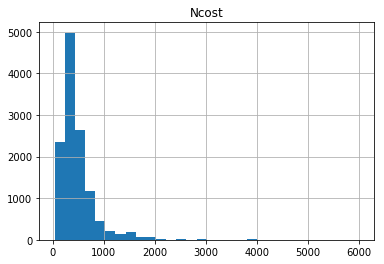

In [15]:
df.hist(column='Ncost',bins=30)

**Creating histogram with 5 areas with most Restraunts.**

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

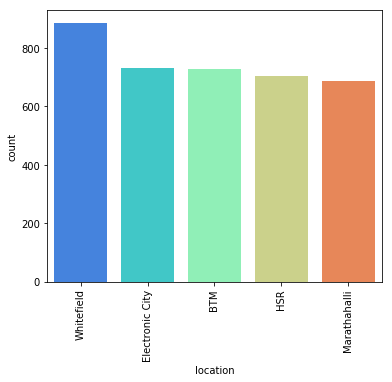

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(x='location',data=df,order=df.location.value_counts().iloc[:5].index,palette='rainbow')
plt.xticks(rotation=90)

**Now we find the area with most Restraunts rated over 4.5 . No surprise as Kormangala comes out on top.**

In [17]:
df2=df[df['Rating']>4.4]

In [18]:
df2.shape
#195 restraunts hace 

(195, 13)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

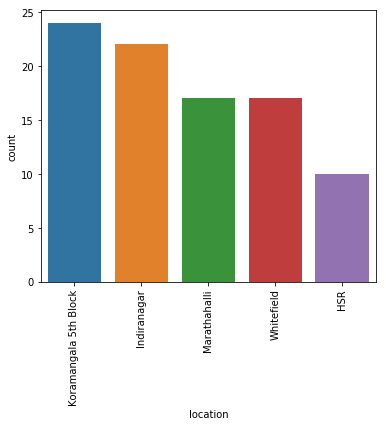

In [19]:
plt.figure(figsize=(6,5))
sns.countplot(x='location',data=df2,order=df2.location.value_counts().iloc[:5].index)
plt.xticks(rotation=90)

**Finding Best Restraunts**

In order to find the best restraunts we need to take care of 2 things :
1. Rating
2. Votes

We can't decide solely on basis of Rating factors. Since there are number of Restraunts with just small difference in rating despite having large difference in number of votes.
Hence taking both factors into consideration , my Top 5 Restraunts are :
1. Byg Brewski Brewing Company
2. Toit
3. Truffles
4. AB's - Absolute Barbecues
5. The Black Pearl

Text(0, 0.5, 'No of Votes')

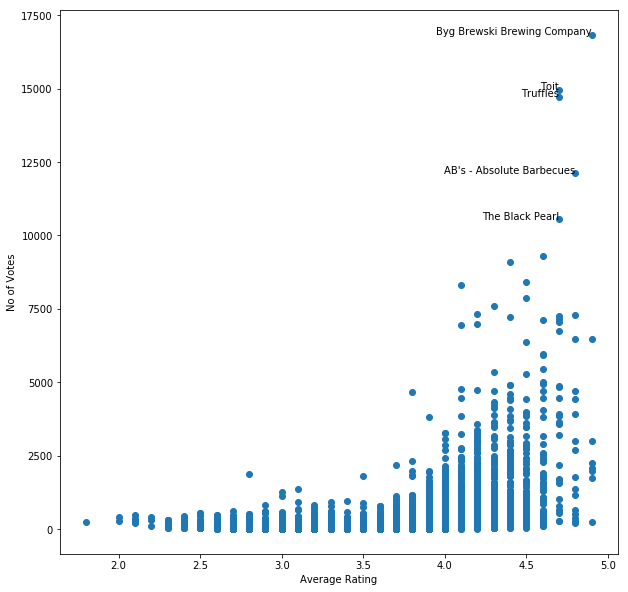

In [20]:
#Top 7 rated restraunts
df=df.sort_values('votes',ascending=False)
fl=df[:5]
plt.figure(figsize=(10,10))

x=df['Rating']
y=df['votes']
plt.scatter(x,y,label='Best Restraunts In Bangalore',marker='o')

label=list(fl['name'])
x=list(fl['Rating'])
y=list(fl['votes'])
for i in range(len(label)):
    plt.annotate(label[i],(x[i],y[i]),ha='right')
plt.xlabel('Average Rating')
plt.ylabel('No of Votes')

**Now we evaluate average cost for 2 persons in few popular areas.**

In [21]:
df['location'].value_counts()
loc=['Whitefield','BTM','Electronic City','HSR','Marathahalli','JP Nagar','Jayanagar','Banashankari','Koramangala 5th Block','Basavanagudi']

In [22]:
df3=df
areacost=pd.DataFrame(columns=['Area','Avg'])
for i in range(len(loc)):
    t3=df3[df3['location']==loc[i]]
    areacost.loc[i]=(loc[i],t3['Ncost'].mean())
areacost=areacost.sort_values('Avg')

In [23]:
areacost.head()

,Area,Avg
9,Basavanagudi,339.810427
1,BTM,378.549724
7,Banashankari,381.224490
3,HSR,441.771429
6,Jayanagar,445.616438


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

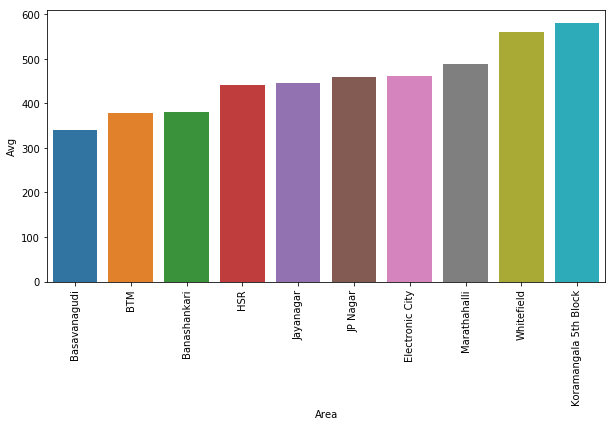

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='Area',y='Avg',data=areacost)
plt.xticks(rotation=90)

**Finding the costliest 5 Restraunts of Bangalore.**

In [25]:
df4=df
df4=df4.sort_values('Ncost',ascending=False)
print(df4[['name','Ncost']].iloc[:5])

                                         name   Ncost
45618  Le Cirque Signature - The Leela Palace  6000.0
40266              Royal Afghan - ITC Windsor  5000.0
42141                  Malties - Radisson Blu  4500.0
40262              La Brasserie - Le Meridien  4100.0
48253     Edo Restaurant & Bar - ITC Gardenia  4000.0


**Now we find the number of restraunts in the given rating range.**

In [26]:
li=np.arange(1.5,5.1,.5)
ratingres=pd.DataFrame(columns=['Rating','Number'])
df5=df
for i in range(len(li)-1):
    t5=df5[df5['Rating']>li[i]]
    t5=t5[t5['Rating']<=li[i+1]]
    ratingres.loc[i]=(str(li[i])+' - '+str(li[i+1]),len(t5))

In [27]:
ratingres.head()

,Rating,Number
0,1.5 - 2.0,3
1,2.0 - 2.5,75
2,2.5 - 3.0,3279
3,3.0 - 3.5,2995
4,3.5 - 4.0,4092


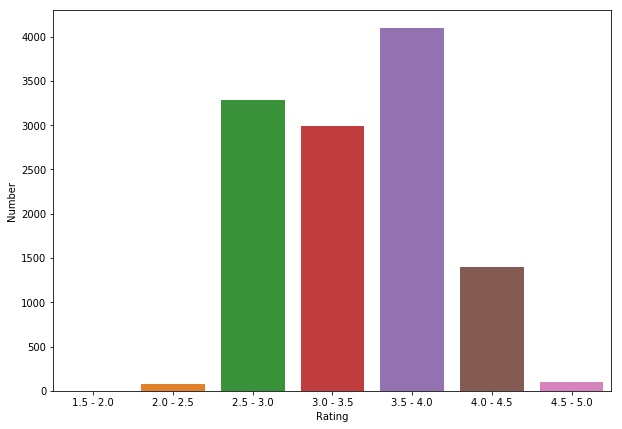

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(x='Rating',y='Number',data=ratingres)
#Most are rated between 3-4 which determines they are average.

**Maximum Outlets**

Okay so this idea of finding the restraunt with most outlet came when I was looking at kernels.One thing which caught my eye was Onesta having 80+ outlets , which clearly is wrong. It possibly was since dataset had listed same place restraunt in different listed_in(type) despite having the same address . Hence I felt to remove those data and came up with different results hence.

In [29]:
df6=df


In [30]:
t6=df6.groupby('name').size().to_frame('count').reset_index().sort_values(['count'],ascending=False)

In [31]:
t6.head()


,name,count
1320,Cafe Coffee Day,54
3788,Just Bake,38
2302,Domino's Pizza,38
5817,Pizza Hut,37
2577,Five Star Chicken,37


Hence **Cafe Coffee Day** has the most outlets and probably correct as well.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

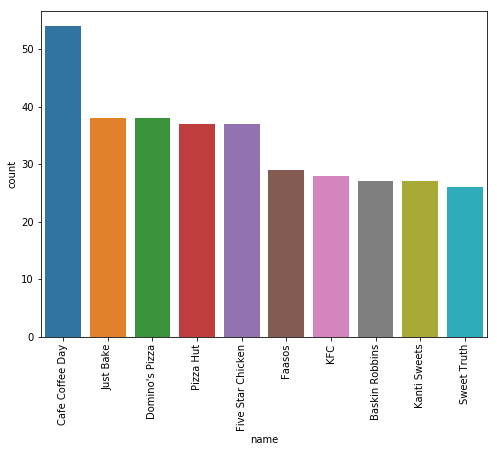

In [32]:
plt.figure(figsize=(8,6))
g=sns.barplot(x='name',y='count',data=t6[:10])
plt.xticks(rotation=90)


Please provide your feedback in comments.
**Thank You!**